# Imports

In [1]:
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import sexToBinary as sb
import wScore
import boxPlot as bp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Formatted Layer Neuron Data (NeuN)

### HC

In [4]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

# NeuN_HC_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_L.pkl'), 'rb') as f:
    NeuN_HC_L = pickle.load(f)
f.close()

# NeuN_HC_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_R.pkl'), 'rb') as f:
    NeuN_HC_R = pickle.load(f)
f.close()

# NeuN_HC_w_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_w_L.pkl'), 'rb') as f:
    NeuN_HC_w_L = pickle.load(f)
f.close()

# NeuN_HC_w_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_w_R.pkl'), 'rb') as f:
    NeuN_HC_w_R = pickle.load(f)
f.close()

### Tau

In [5]:
# NeuN_Tau
with open(os.path.join(layer_dataDir, 'NeuN_Tau.pkl'), 'rb') as f:
    NeuN_Tau = pickle.load(f)
f.close()

# NeuN_Tau_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_L.pkl'), 'rb') as f:
    NeuN_Tau_L = pickle.load(f)
f.close()

# NeuN_Tau_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_R.pkl'), 'rb') as f:
    NeuN_Tau_R = pickle.load(f)
f.close()

# NeuN_Tau_w_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_w_L.pkl'), 'rb') as f:
    NeuN_Tau_w_L = pickle.load(f)
f.close()

# NeuN_Tau_w_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_w_R.pkl'), 'rb') as f:
    NeuN_Tau_w_R = pickle.load(f)
f.close()

### TDP

In [6]:
# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

# NeuN_TDP_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_L.pkl'), 'rb') as f:
    NeuN_TDP_L = pickle.load(f)
f.close()

# NeuN_TDP_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_R.pkl'), 'rb') as f:
    NeuN_TDP_R = pickle.load(f)
f.close()

# NeuN_TDP_w_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_w_L.pkl'), 'rb') as f:
    NeuN_TDP_w_L = pickle.load(f)
f.close()

# NeuN_TDP_w_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_w_R.pkl'), 'rb') as f:
    NeuN_TDP_w_R = pickle.load(f)
f.close()

# Box/Scatter Plot of HC, Tau, TDP [NeuN] - ORIGINAL

In [7]:
# Labels for x-axis
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3(Paracingulate)', 'L23_4(Rectus)',
               'L23_5(Middle Frontal)', 'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3(Paracingulate)',
               'L56_4(Rectus)', 'L56_5(Middle Frontal)']

In [8]:
# min max
all_values = np.concatenate([NeuN_HC.flatten(), NeuN_Tau.flatten(), NeuN_TDP.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_LR = min_val - buffer
max_LR = max_val + buffer

# min max
all_values = np.concatenate([NeuN_HC_L.flatten(), NeuN_Tau_L.flatten(), NeuN_TDP_L.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_L = min_val - buffer
max_L = max_val + buffer

# min max
all_values = np.concatenate([NeuN_HC_R.flatten(), NeuN_Tau_R.flatten(), NeuN_TDP_R.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_R = min_val - buffer
max_R = max_val + buffer

## L+R Mean

### HC

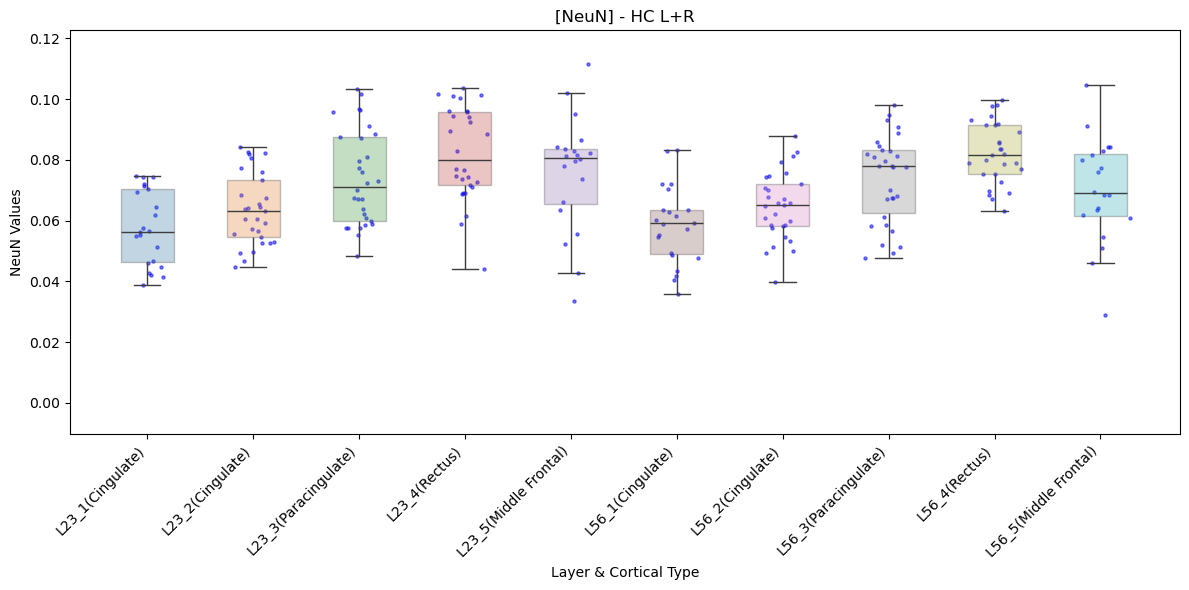

In [9]:
# HC
data = NeuN_HC

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_LR  # Minimum limit
y_max_limit = max_LR  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - HC L+R')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TAU

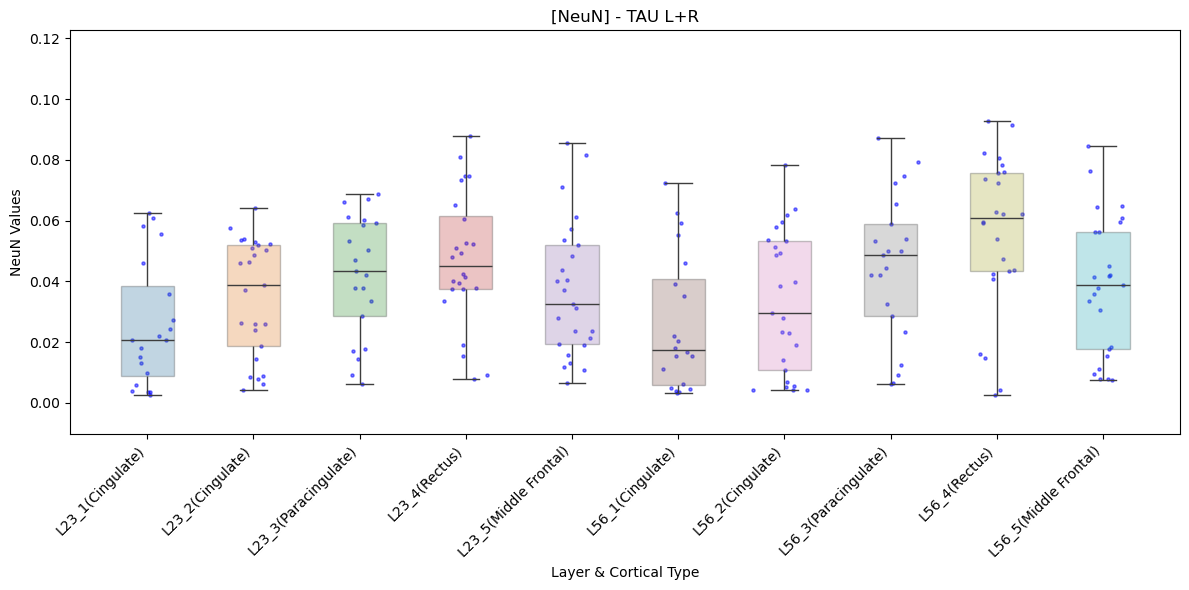

In [10]:
# TAU
data = NeuN_Tau

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_LR  # Minimum limit
y_max_limit = max_LR  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - TAU L+R')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TDP

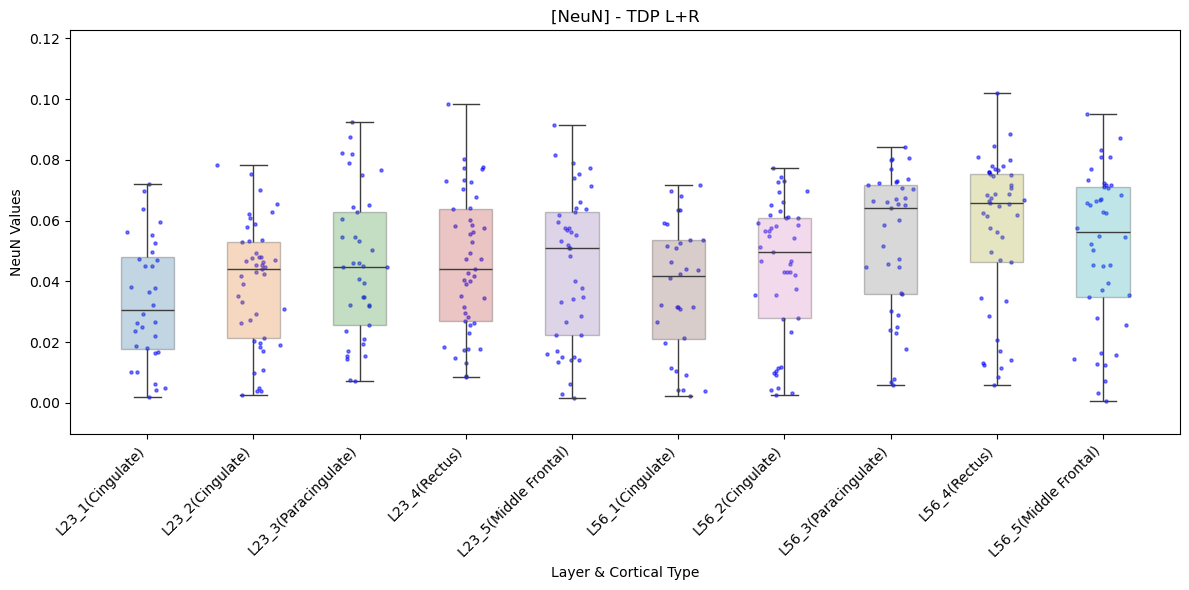

In [11]:
# TDP
data = NeuN_TDP

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_LR  # Minimum limit
y_max_limit = max_LR  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - TDP L+R')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

## LEFT

### HC

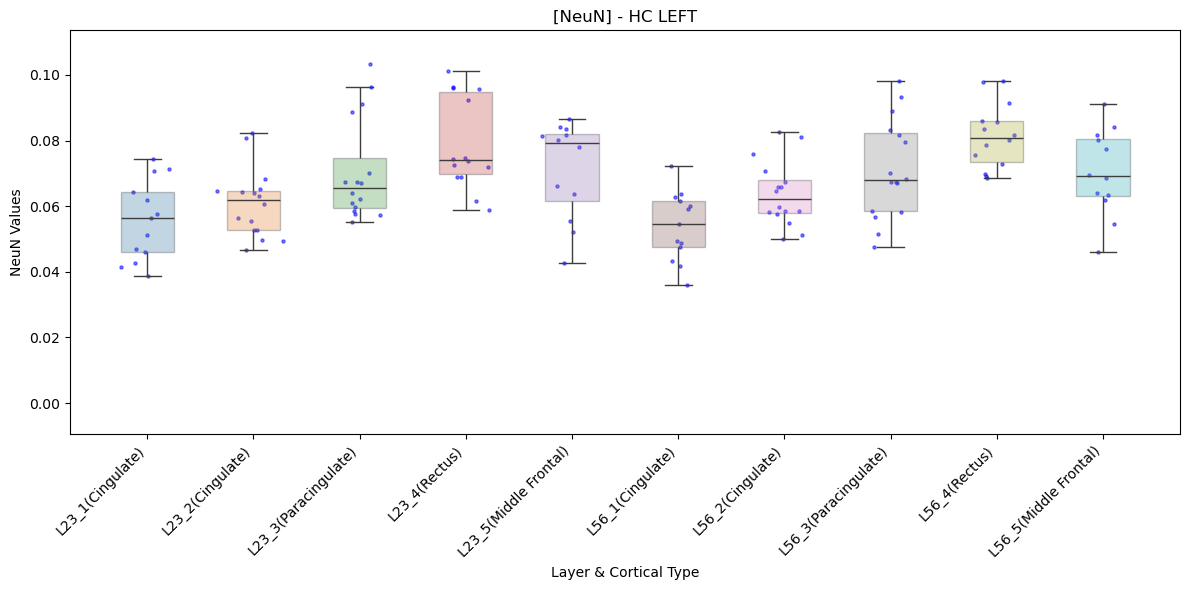

In [12]:
# HC
data = NeuN_HC_L

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_L  # Minimum limit
y_max_limit = max_L  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - HC LEFT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TAU

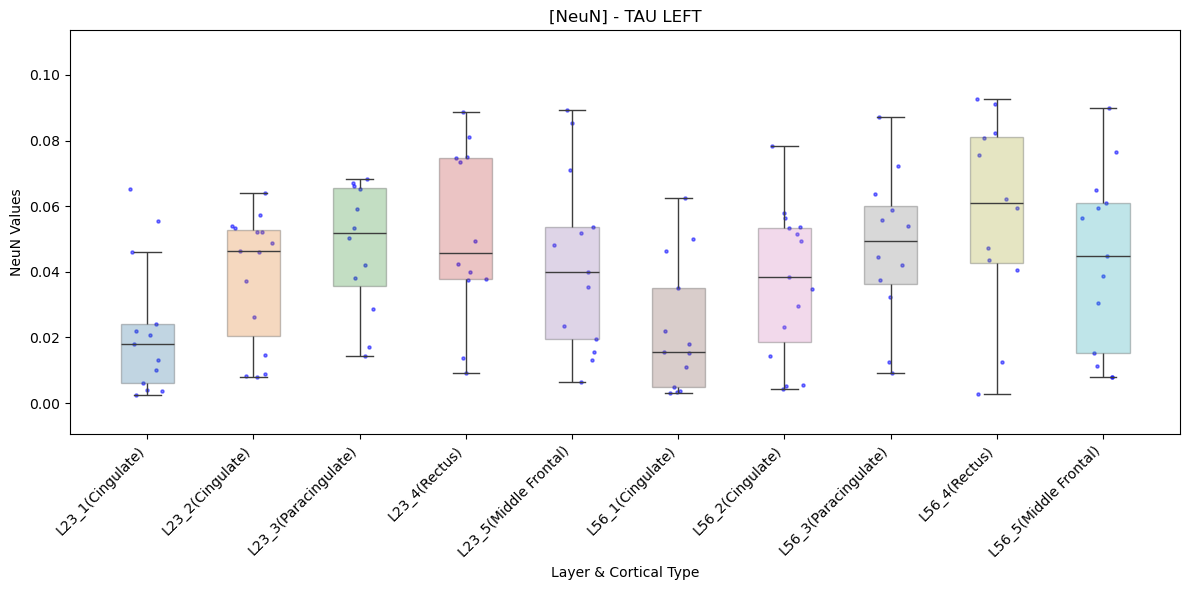

In [13]:
# TAU
data = NeuN_Tau_L

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_L  # Minimum limit
y_max_limit = max_L  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - TAU LEFT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TDP

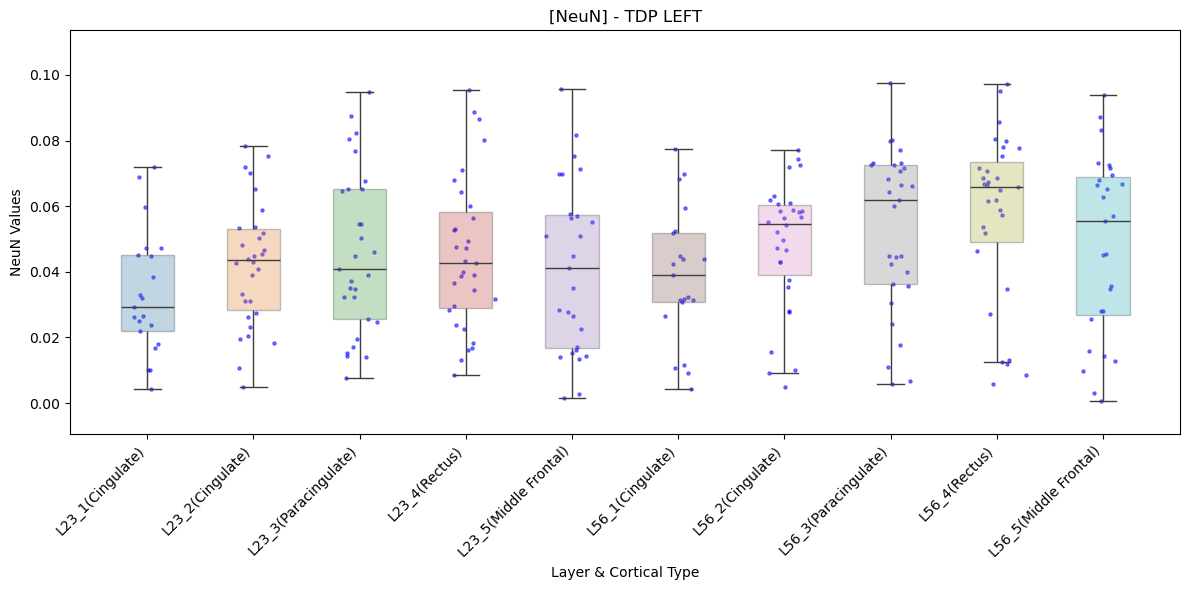

In [14]:
# TDP
data = NeuN_TDP_L

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_L  # Minimum limit
y_max_limit = max_L  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - TDP LEFT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

## RIGHT

### HC

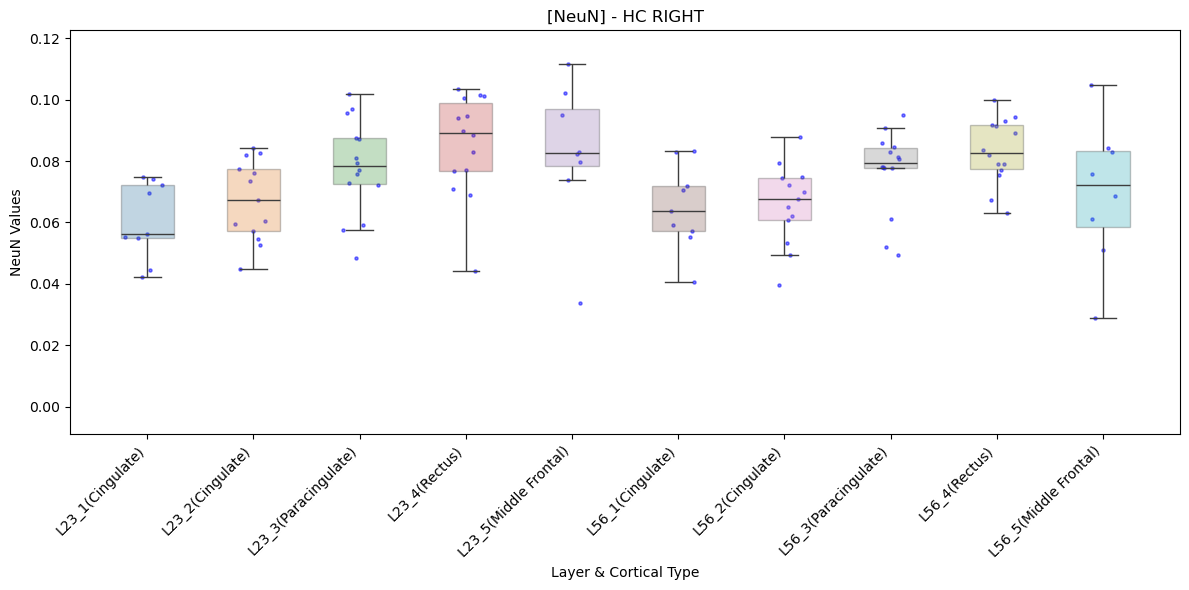

In [15]:
# HC
data = NeuN_HC_R

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_R  # Minimum limit
y_max_limit = max_R  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - HC RIGHT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TAU

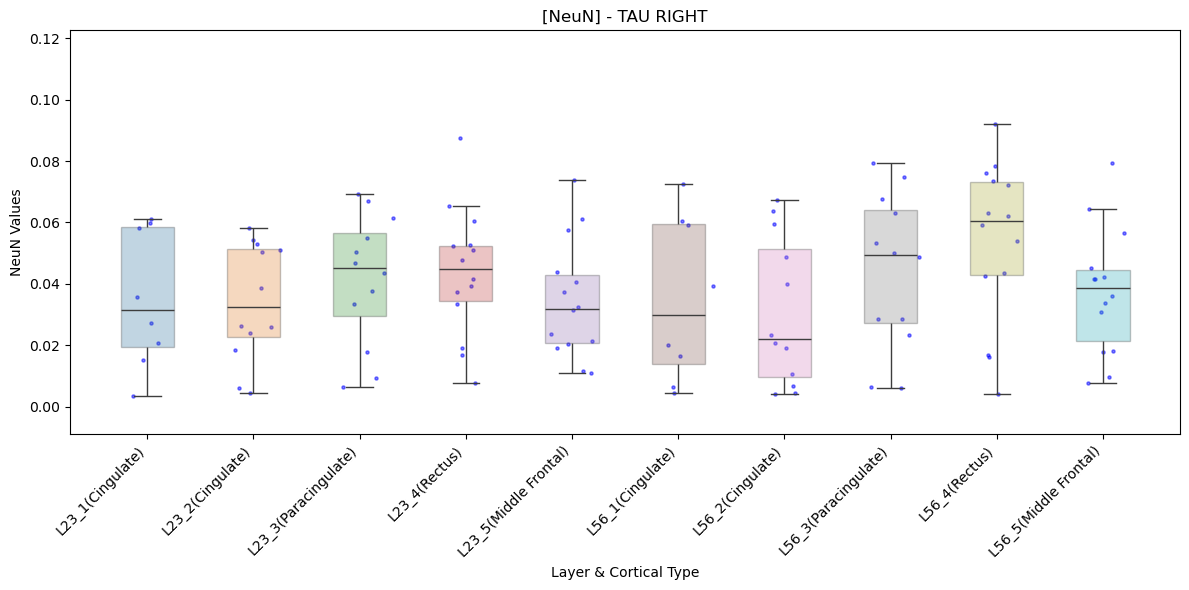

In [16]:
# TAU
data = NeuN_Tau_R

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_R  # Minimum limit
y_max_limit = max_R  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - TAU RIGHT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TDP

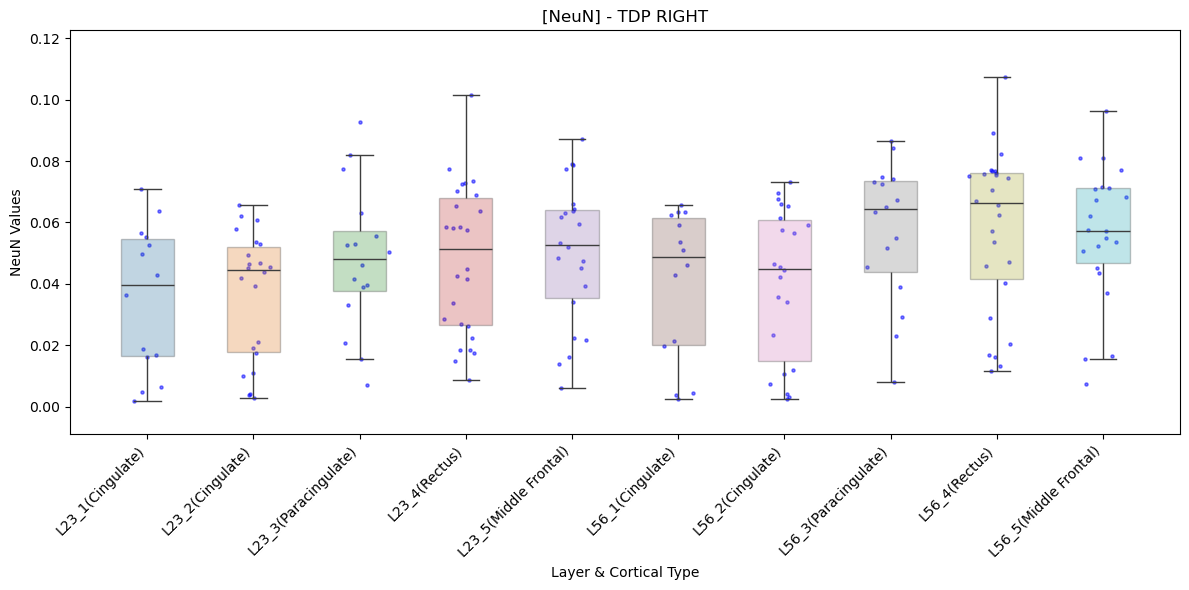

In [17]:
# TDP
data = NeuN_TDP_R

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_R  # Minimum limit
y_max_limit = max_R  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN] - TDP RIGHT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

# Box/Scatter Plot of HC, Tau, TDP [NeuN] - W Score

In [18]:
# Labels for x-axis
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3(Paracingulate)', 'L23_4(Rectus)',
               'L23_5(Middle Frontal)', 'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3(Paracingulate)',
               'L56_4(Rectus)', 'L56_5(Middle Frontal)']

In [19]:
# min max
all_values = np.concatenate([NeuN_HC_w_L.flatten(), NeuN_Tau_w_L.flatten(), NeuN_TDP_w_L.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_L = min_val - buffer
max_L = max_val + buffer

# min max
all_values = np.concatenate([NeuN_HC_w_R.flatten(), NeuN_Tau_w_R.flatten(), NeuN_TDP_w_R.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_R = min_val - buffer
max_R = max_val + buffer

## LEFT

### HC

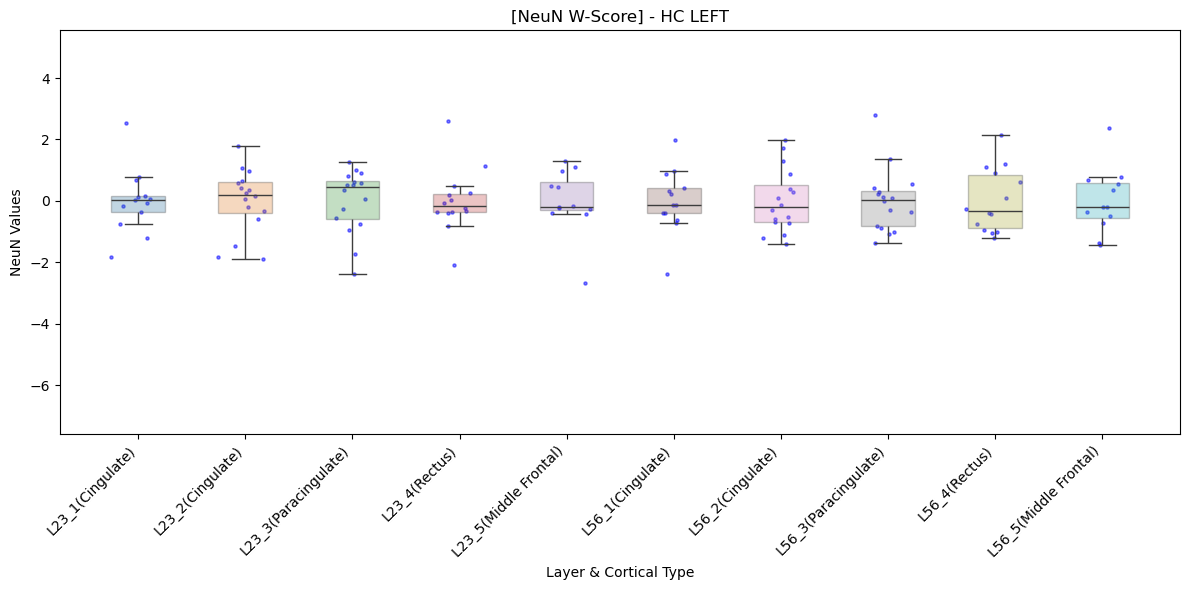

In [20]:
# HC
data = NeuN_HC_w_L

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_L  # Minimum limit
y_max_limit = max_L  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN W-Score] - HC LEFT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TAU

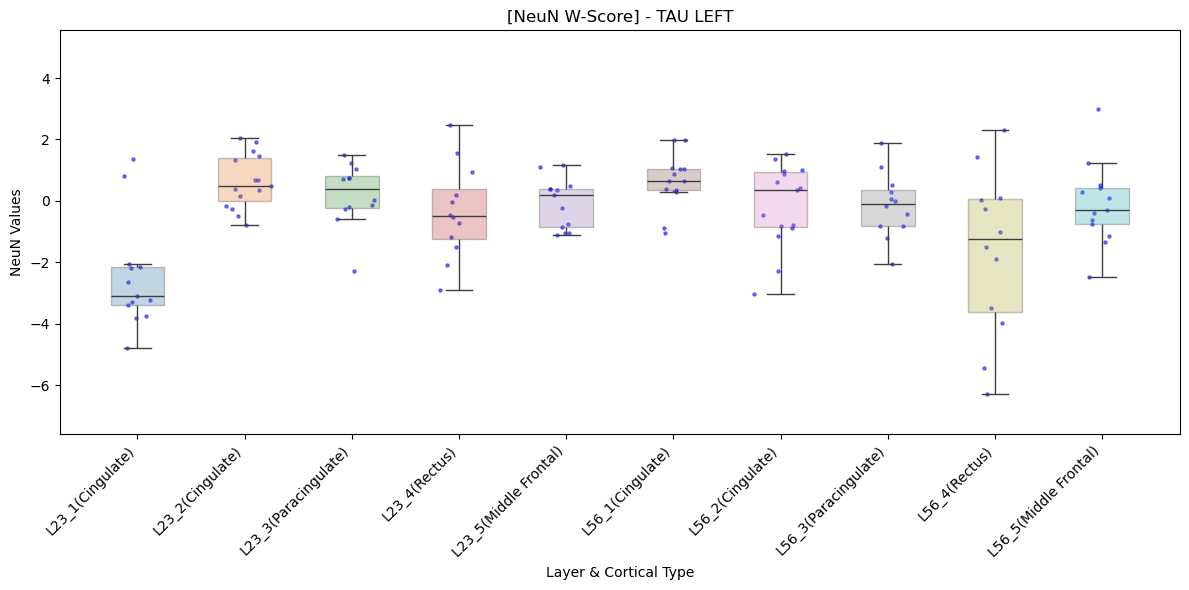

In [21]:
# TAU
data = NeuN_Tau_w_L

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_L  # Minimum limit
y_max_limit = max_L  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN W-Score] - TAU LEFT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TDP

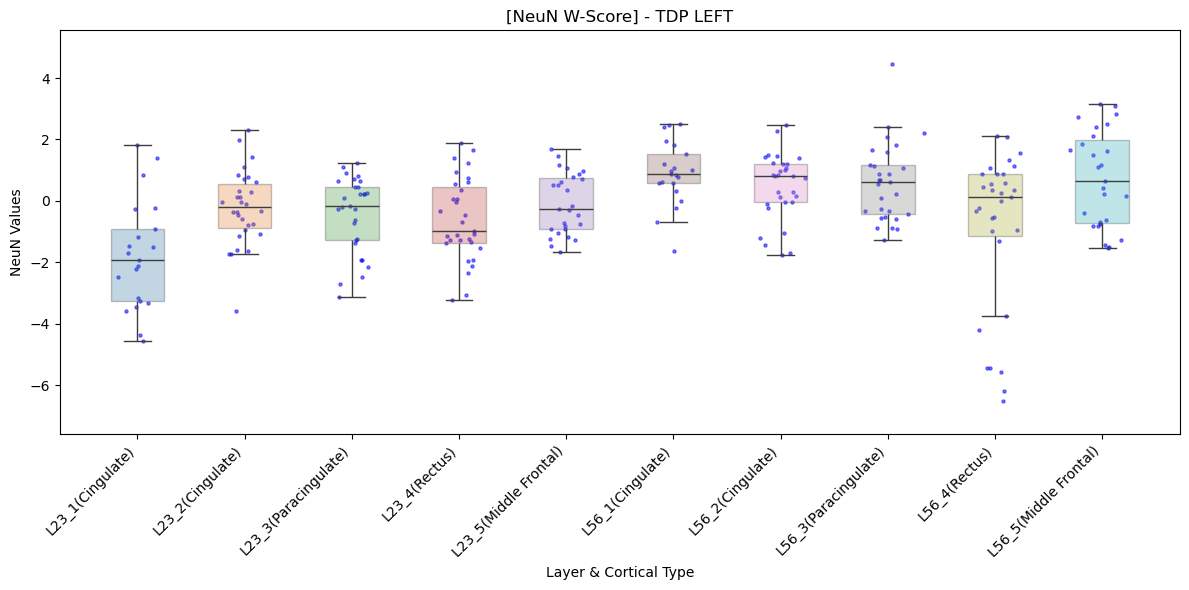

In [22]:
# TDP
data = NeuN_TDP_w_L

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_L  # Minimum limit
y_max_limit = max_L  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN W-Score] - TDP LEFT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

## RIGHT

### HC

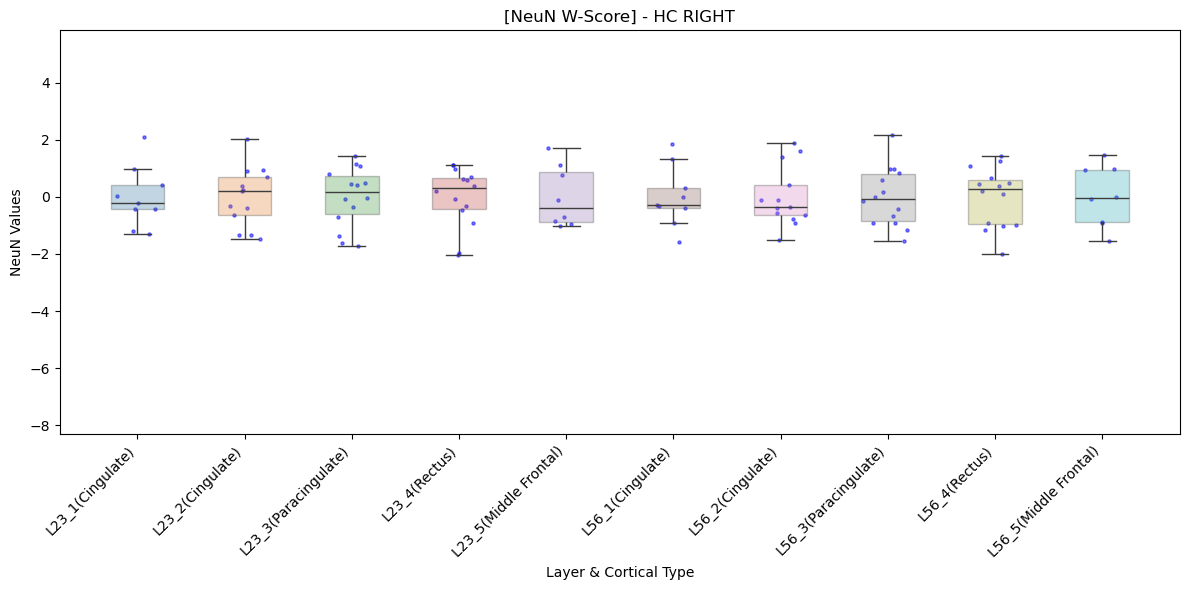

In [23]:
# HC
data = NeuN_HC_w_R

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_R  # Minimum limit
y_max_limit = max_R  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN W-Score] - HC RIGHT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TAU

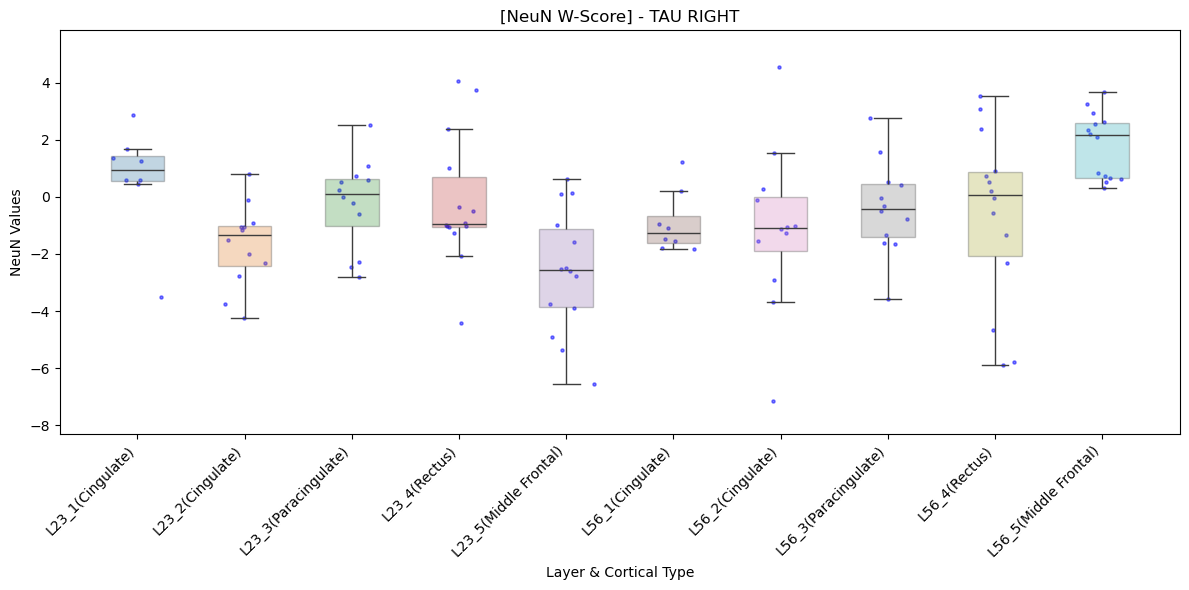

In [24]:
# TAU
data = NeuN_Tau_w_R

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_R  # Minimum limit
y_max_limit = max_R  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN W-Score] - TAU RIGHT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

### TDP

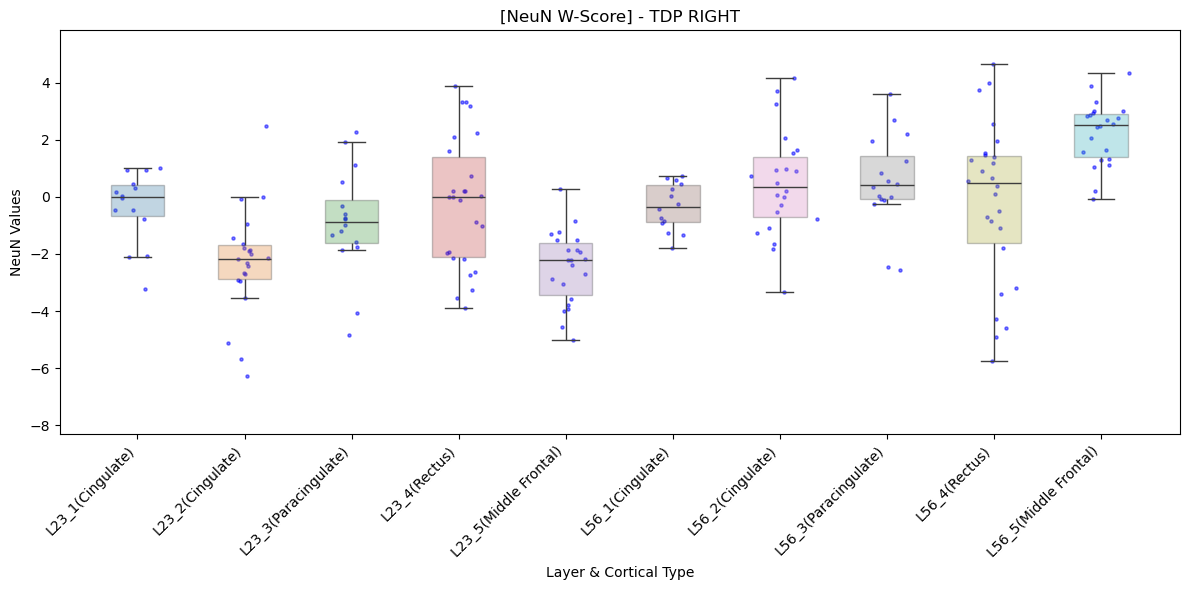

In [25]:
# TDP
data = NeuN_TDP_w_R

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create boxplots for each column
boxplot = sns.boxplot(data=data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

# Add individual data points with aligned x-values
for i, col_data in enumerate(data.T):
    jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
    x = np.full_like(col_data, i) + jitter
    ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

# Set x-axis labels
ax.set_xticks(np.arange(0, 10))
ax.set_xticklabels(NeuN_Labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

# Set y-axis limits (replace these values with your desired limits)
y_min_limit = min_R  # Minimum limit
y_max_limit = max_R  # Maximum limit
ax.set_ylim(y_min_limit, y_max_limit)

# Set plot title and labels
ax.set_title('[NeuN W-Score] - TDP RIGHT')
ax.set_xlabel('Layer & Cortical Type')
ax.set_ylabel('NeuN Values')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
NeuN_TDP_R

array([[       nan, 0.00405318,        nan, 0.01760517,        nan,
               nan, 0.00241803,        nan, 0.01695514,        nan],
       [0.05254784, 0.04530593,        nan, 0.05837708, 0.05337888,
        0.06343391, 0.06947589,        nan, 0.07537286, 0.05748615],
       [0.01625083, 0.04694566,        nan, 0.07290161, 0.05203489,
        0.01967974, 0.02340679,        nan, 0.07602723, 0.05221838],
       [       nan, 0.01905017, 0.00720366, 0.00883406, 0.01394618,
               nan, 0.01062507, 0.0229793 , 0.01150553, 0.01644074],
       [       nan,        nan, 0.05040721, 0.05813275,        nan,
               nan,        nan, 0.08652676, 0.07702869,        nan],
       [0.00195534, 0.00270734,        nan, 0.01491794,        nan,
        0.00240883, 0.00320983,        nan, 0.0205688 ,        nan],
       [0.05539423, 0.06081343, 0.06297011, 0.07347933, 0.06182743,
        0.05902413, 0.06607435, 0.06517546, 0.07673042, 0.06842397],
       [0.00633756, 0.00378963,        na

In [28]:
NeuN_TDP_w_R

array([[            nan, -1.86217803e+00,             nan,
         3.19935240e+00,             nan,             nan,
        -5.36666822e-01,             nan, -4.61116090e+00,
                    nan],
       [-2.07321093e+00, -5.69543859e+00,             nan,
        -3.27877853e+00, -4.00158761e+00,  6.47004067e-01,
         4.15559144e+00,             nan,  1.97479160e+00,
         2.87515795e+00],
       [-4.50803361e-01,  2.47800674e+00,             nan,
        -1.10728393e-02, -1.91998968e+00, -8.36299739e-01,
        -3.32360365e+00,             nan,  3.93635926e-01,
         1.11062855e+00],
       [            nan, -7.36084124e-02, -9.90433597e-01,
         3.32553958e+00, -1.29029467e+00,             nan,
        -1.65393480e+00,  4.71282920e-01, -4.92036918e+00,
         1.65497547e+00],
       [            nan,             nan, -4.08356730e+00,
        -1.97019869e+00,             nan,             nan,
                    nan,  3.59556598e+00,  1.53337167e+00,
           